## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results, on ='Mouse ID', how = 'outer', sort = False )
# Display the data table for preview

mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice
len(mouse_metadata['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df['Mouse ID'].value_counts()

g989    13
w914    10
q787    10
i557    10
d251    10
        ..
t573     1
o848     1
n482     1
x226     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df['Mouse ID']=='g989',:]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexref=(mouse_df.loc[mouse_df['Mouse ID']=='g989',:].index)
mouse_df.drop(indexref, inplace= True)

In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_df['Mouse ID'].value_counts()


w914    10
o562    10
a818    10
i557    10
d251    10
        ..
t573     1
o848     1
n482     1
x226     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_tumor=mouse_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(by='Drug Regimen')


tumor_vol_stats = pd.DataFrame(mouse_tumor.mean())
tumor_vol_stats.rename(columns = {'Tumor Volume (mm3)': 'Mean'}, inplace = True)
tumor_vol_stats['Median']=mouse_tumor.median()
tumor_vol_stats['Variance']=mouse_tumor.var()
tumor_vol_stats['STD']=mouse_tumor.std()
tumor_vol_stats['SEM']=mouse_tumor.sem()

tumor_vol_stats

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouse_tumor.agg(['mean', 'median','var','std','sem'])



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_count = pd.DataFrame(mouse_tumor.count()).reset_index()
measure_count.rename(columns = {'Tumor Volume (mm3)': 'Number of Measurments Taken'}, inplace = True)
measure_count

,Drug Regimen,Number of Measurments Taken
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


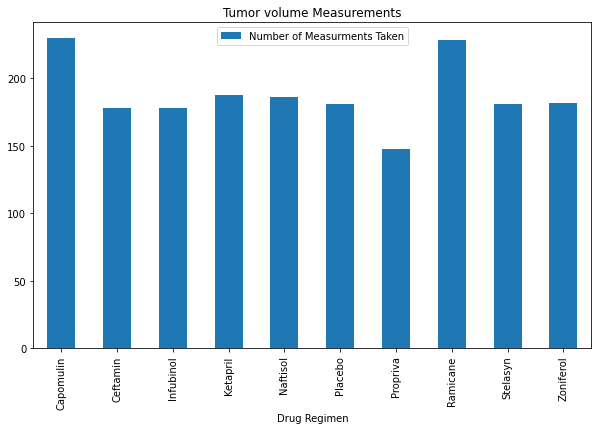

In [10]:
pd_bar=measure_count.plot.bar(x='Drug Regimen', y='Number of Measurments Taken', rot=90, figsize = (10,6),\
                              title= 'Tumor volume Measurements')


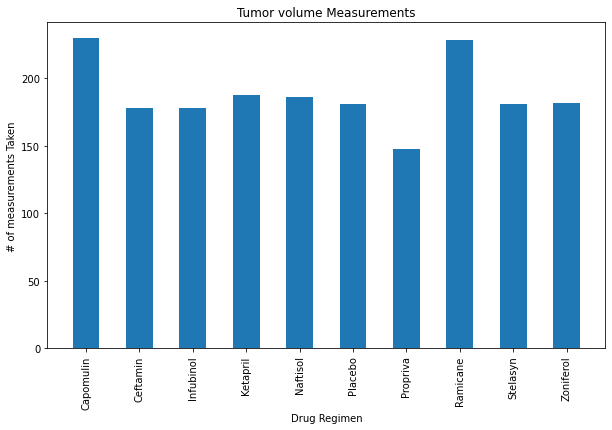

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure(figsize=(10,6))
pyplot_bar=plt.bar(measure_count['Drug Regimen'],measure_count['Number of Measurments Taken'], width= 0.5)

plt.xticks(rotation='vertical')

plt.title('Tumor volume Measurements')
plt.xlabel('Drug Regimen')
plt.ylabel('# of measurements Taken')

plt.show()

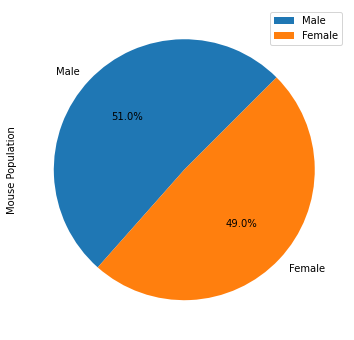

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

ms=mouse_df[['Sex']]
ms=pd.DataFrame(ms['Sex'].value_counts())
ms.rename(columns = {'Sex': 'Mouse Population'}, inplace = True)

mouse_sex = ms.plot.pie(subplots=True, figsize=(6, 6), startangle= 45, autopct='%1.1f%%')

In [13]:
ms

,Mouse Population
Male,958
Female,922


/Users/leonidesguerra/opt/miniconda3/envs/pythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  after removing the cwd from sys.path.


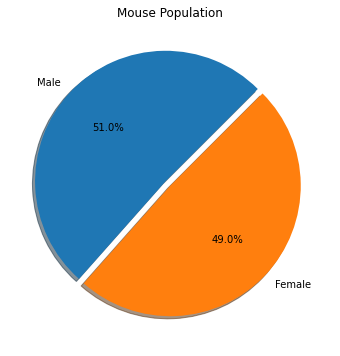

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(6,6))
labels= ['Male', 'Female']
plt.pie(ms, autopct="%1.1f%%",labels=labels, startangle=45, explode=(0.05,0), shadow = True)
plt.title('Mouse Population')
plt.show()

In [15]:
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_tumor_vol=mouse_df.loc[(mouse_df['Drug Regimen']=='Capomulin')|\
                        (mouse_df['Drug Regimen']=='Ramicane')|\
                        (mouse_df['Drug Regimen']=='Infubinol')|\
                        (mouse_df['Drug Regimen']=='Ceftamin'),:].groupby('Mouse ID').agg({'Timepoint':['max']})
ltv=pd.DataFrame(last_tumor_vol).reset_index()
ltv.columns=['Mouse ID', 'Timepoint']
ltv
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_vol_df= pd.merge(mouse_df, ltv, on = ['Mouse ID','Timepoint'])
final_tumor_vol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatmens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
